# Predicting Encryption Algorithms from Ciphertext

### Implement the Classical Cipher Algorithms

In [1]:
import random
import csv

# POLLUX Cipher Encryption Function
def pollux_cipher_encrypt(plaintext):
    mapping = {
        'A': '11', 'B': '12', 'C': '13', 'D': '14', 'E': '15',
        'F': '21', 'G': '22', 'H': '23', 'I': '24', 'J': '25',
        'K': '31', 'L': '32', 'M': '33', 'N': '34', 'O': '35',
        'P': '41', 'Q': '42', 'R': '43', 'S': '44', 'T': '45',
        'U': '51', 'V': '52', 'W': '53', 'X': '54', 'Y': '55',
        'Z': '61'
    }
    ciphertext = ""
    for char in plaintext.upper():
        if char.isalpha():
            ciphertext += mapping[char] + random.choice(['.', '-', ''])
        else:
            ciphertext += char
    return ciphertext

# PROGRESSIVE KEY Cipher Encryption Function
def progressive_key_encrypt(plaintext, key):
    ciphertext = ""
    key_index = 0
    key_length = len(key)
    for char in plaintext.upper():
        if char.isalpha():
            shift = key[key_index % key_length]
            new_char = chr(((ord(char) - 65 + shift) % 26) + 65)
            ciphertext += new_char
            key_index += 1
        else:
            ciphertext += char
    return ciphertext

# Generate Random Plaintext
def generate_random_plaintext(length):
    return ''.join(random.choice('ABCDEFGHIJKLMNOPQRSTUVWXYZ ') for _ in range(length))

# Generate Dataset
def generate_dataset(num_samples, key):
    data = []
    for _ in range(num_samples // 2):  # Half for each cipher
        # Generate random plaintext of varying lengths
        plaintext_pollux = generate_random_plaintext(random.randint(80, 100))
        plaintext_progkey = generate_random_plaintext(random.randint(100, 150))
        
        # Encrypt using POLLUX
        ciphertext_pollux = pollux_cipher_encrypt(plaintext_pollux)
        data.append([ciphertext_pollux, "POLLUX"])
        
        # Encrypt using PROGRESSIVE KEY
        ciphertext_progkey = progressive_key_encrypt(plaintext_progkey, key)
        data.append([ciphertext_progkey, "PROGRESSIVE_KEY"])
    
    return data

# Save to CSV
def save_to_csv(data, filename):
    with open(filename, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        writer.writerow(["Ciphertext", "Algorithm"])
        writer.writerows(data)

# Main Execution
key = [3, 1, 4, 1, 5]  # Example Progressive Key
dataset = generate_dataset(200, key)
save_to_csv(dataset, "cipher_dataset.csv")

print("Dataset generated and saved to 'cipher_dataset.csv'")


Dataset generated and saved to 'cipher_dataset.csv'


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Load Dataset
data = pd.read_csv("cipher_dataset.csv")

# Split Dataset
X = data['Ciphertext']
y = data['Algorithm']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize Ciphertext (Bag-of-Words)
vectorizer = CountVectorizer(analyzer='char')  # Use character-level tokenization
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


### Training Machine Learning Classifiers

Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



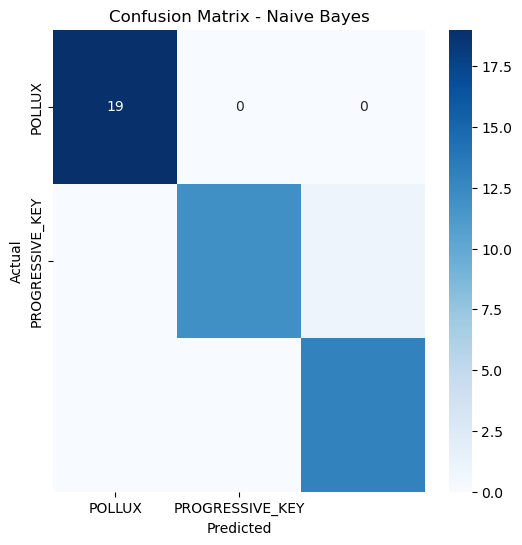

Naive Bayes Accuracy: 0.9778


In [13]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Train the Naive Bayes model
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)

# Make predictions
y_pred_nb = naive_bayes_model.predict(X_test)

# Evaluate performance
print("Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))

# Confusion Matrix for Naive Bayes
cm_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(6, 6))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', xticklabels=['POLLUX', 'PROGRESSIVE_KEY'], yticklabels=['POLLUX', 'PROGRESSIVE_KEY'])
plt.title('Confusion Matrix - Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Accuracy
accuracy_nb = np.mean(y_pred_nb == y_test)
print(f"Naive Bayes Accuracy: {accuracy_nb:.4f}")


Neural Network Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



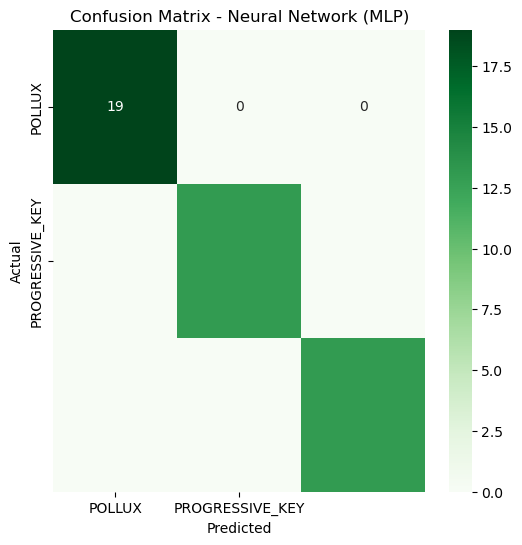

Neural Network Accuracy: 1.0000


In [14]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Train the Neural Network (MLP) model
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)
mlp_model.fit(X_train, y_train)

# Make predictions
y_pred_mlp = mlp_model.predict(X_test)

# Evaluate performance
print("Neural Network Classification Report:\n", classification_report(y_test, y_pred_mlp))

# Confusion Matrix for Neural Network (MLP)
cm_mlp = confusion_matrix(y_test, y_pred_mlp)
plt.figure(figsize=(6, 6))
sns.heatmap(cm_mlp, annot=True, fmt='d', cmap='Greens', xticklabels=['POLLUX', 'PROGRESSIVE_KEY'], yticklabels=['POLLUX', 'PROGRESSIVE_KEY'])
plt.title('Confusion Matrix - Neural Network (MLP)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Accuracy
accuracy_mlp = np.mean(y_pred_mlp == y_test)
print(f"Neural Network Accuracy: {accuracy_mlp:.4f}")


Epoch 1/10


C:\Users\ratho\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3531 - loss: 1.1006
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3312 - loss: 1.0994
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3514 - loss: 1.0985
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3476 - loss: 1.0984
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3214 - loss: 1.1007
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3622 - loss: 1.0981
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3447 - loss: 1.0971
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3536 - loss: 1.0981
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3417 - loss: 1.0975
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3292 - loss: 1.1001
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
LSTM Classification Report:
               precision    recall  f1-score   support

           0       0.31      0.48      0.38     

C:\Users\ratho\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ratho\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ratho\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


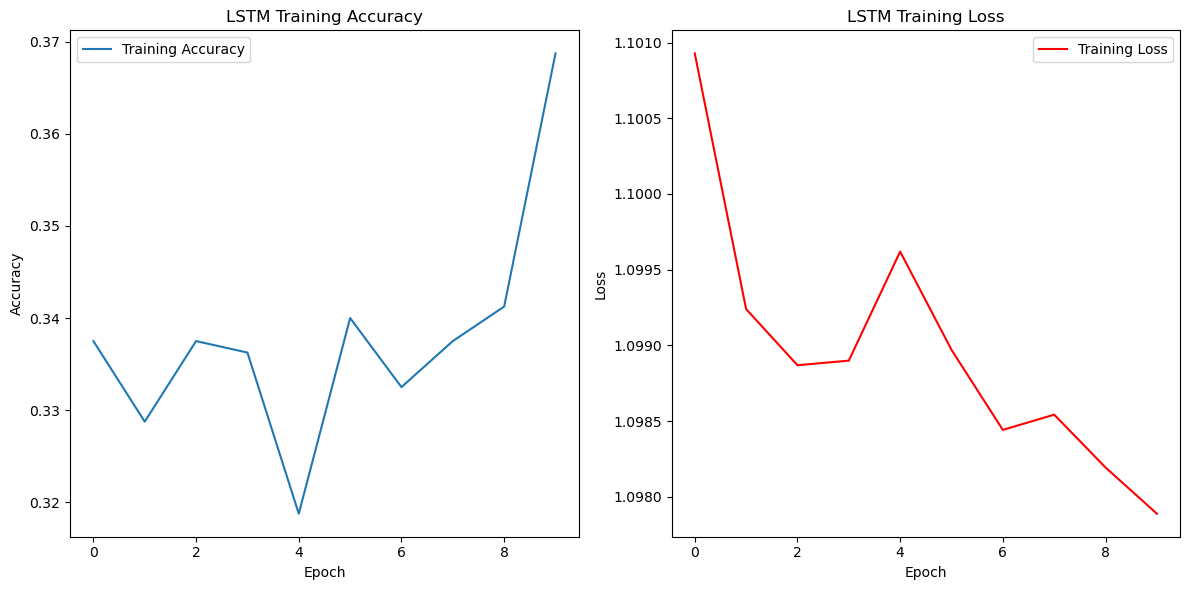

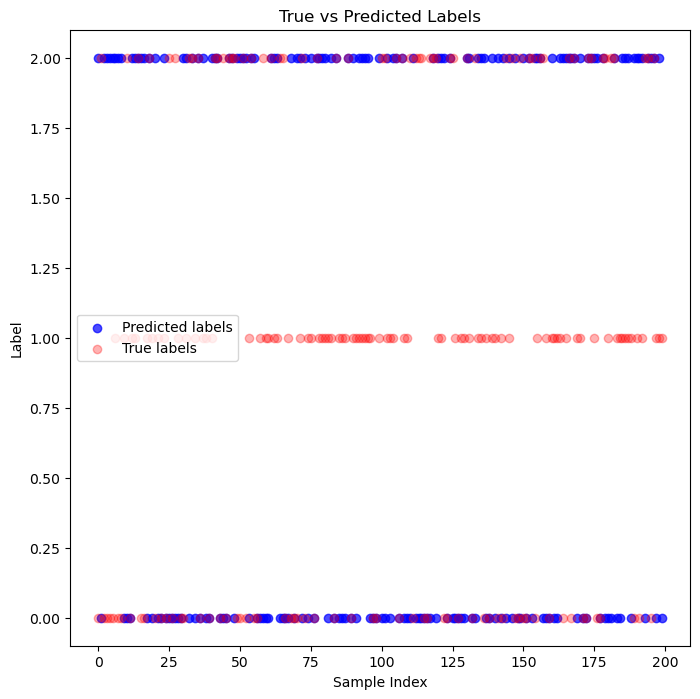

In [16]:
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Sample dataset creation (replace this with your actual data)
# Let's assume your dataset is loaded into X (features) and y (labels)
# Example: 1000 samples, 10 features (for simplicity)
X = np.random.rand(1000, 10)  # Example feature data
y = np.random.choice([0, 1, 2], size=1000)  # Labels: 3 classes (0, 1, 2)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features (important for LSTM)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)  # Reshape for LSTM input
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)  # Reshape for LSTM input

# Label encoding to make sure labels are integer-based
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)  # Fit and transform on training labels
y_test_encoded = encoder.transform(y_test)  # Only transform on test labels

# Define the LSTM model
lstm_model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2])),  # LSTM layer
    tf.keras.layers.Dense(3, activation='softmax')  # 3 output units for 3 classes
])

# Compile the model
lstm_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = lstm_model.fit(X_train, y_train_encoded, epochs=10, batch_size=32)

# Make predictions
y_pred_lstm = np.argmax(lstm_model.predict(X_test), axis=1)

# Evaluate performance
print("LSTM Classification Report:\n", classification_report(y_test_encoded, y_pred_lstm))

# Plot training loss and accuracy
plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('LSTM Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='red')
plt.title('LSTM Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Additional: Evaluate model performance visually
plt.figure(figsize=(8, 8))
plt.scatter(np.arange(len(y_pred_lstm)), y_pred_lstm, c='blue', label="Predicted labels", alpha=0.7)
plt.scatter(np.arange(len(y_test_encoded)), y_test_encoded, c='red', label="True labels", alpha=0.3)
plt.title('True vs Predicted Labels')
plt.xlabel('Sample Index')
plt.ylabel('Label')
plt.legend()
plt.show()


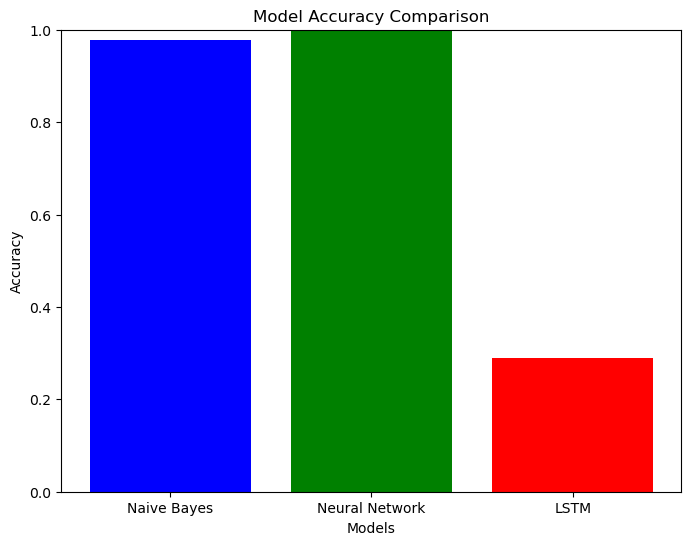

In [17]:
import matplotlib.pyplot as plt

# Create accuracy comparison chart
accuracy_scores = [accuracy_nb, accuracy_mlp, accuracy_lstm]
models = ['Naive Bayes', 'Neural Network', 'LSTM']

plt.figure(figsize=(8, 6))
plt.bar(models, accuracy_scores, color=['blue', 'green', 'red'])
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Accuracy range from 0 to 1
plt.show()


Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 350ms/step - accuracy: 0.3323 - loss: 1.1755 - val_accuracy: 0.3375 - val_loss: 1.1448
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.3458 - loss: 1.1598 - val_accuracy: 0.3187 - val_loss: 1.1381
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.2854 - loss: 1.1821 - val_accuracy: 0.3250 - val_loss: 1.1328
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.3333 - loss: 1.1475 - val_accuracy: 0.3125 - val_loss: 1.1282
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.3469 - loss: 1.1378 - val_accuracy: 0.3188 - val_loss: 1.1241
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.3260 - loss: 1.1248 - val_accuracy: 0.3125 - val_loss: 1.1207
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.3583 - loss: 1.1377 - val_accuracy: 0.3062 - val_loss: 1.1178
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.3229 - loss: 1.1334 - val_accuracy: 0.3000 - val_loss: 1.1152

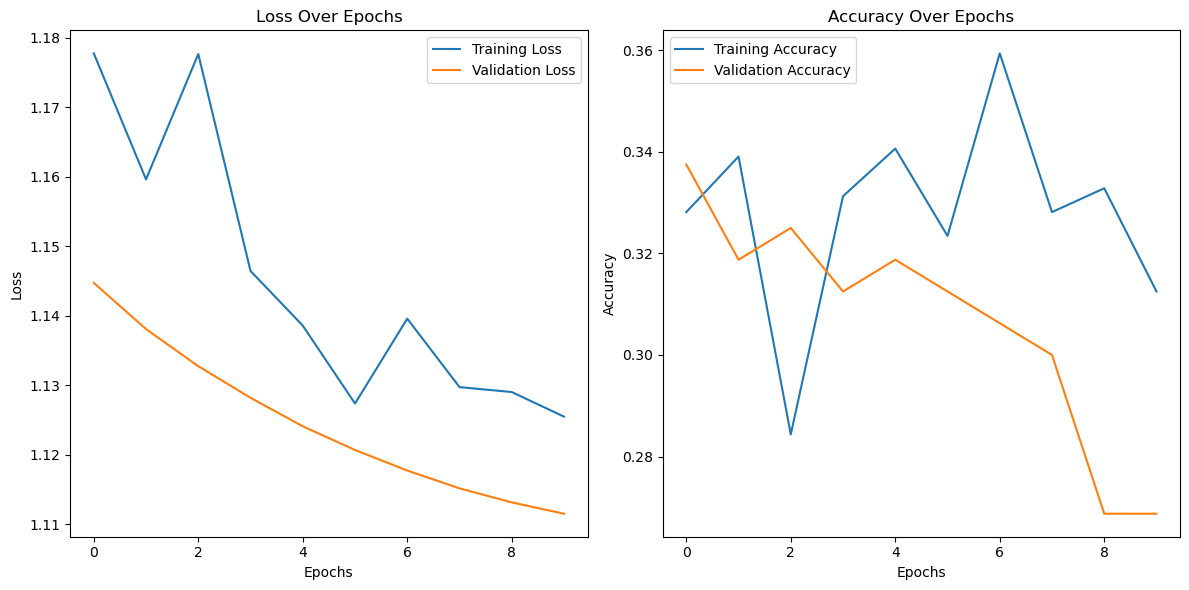

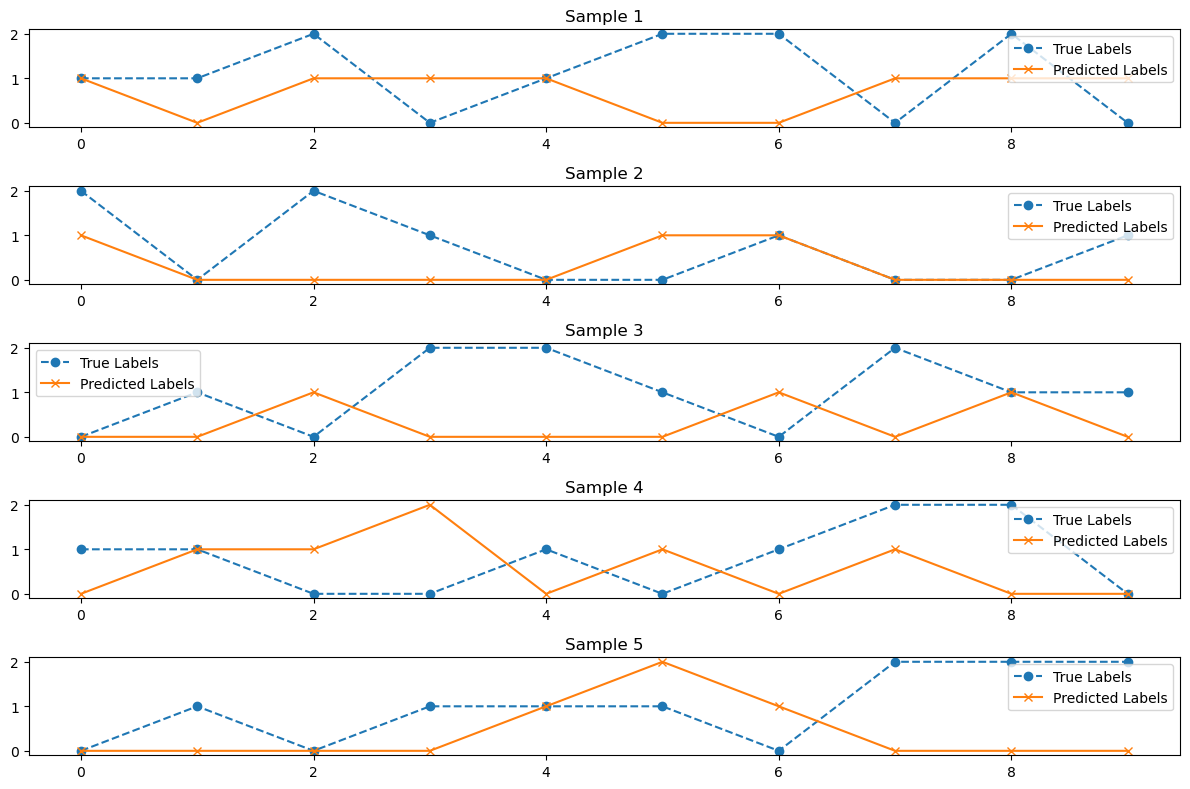

In [23]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, MultiHeadAttention, LayerNormalization, Dropout
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Generate synthetic data for the sequence classification task
X = np.random.rand(100, 10, 5)  # 100 samples, 10 timesteps, 5 features
y = np.random.randint(0, 3, (100, 10))  # 3 classes for each timestep

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Transformer model
input_layer = Input(shape=(10, 5))
attention_output = MultiHeadAttention(num_heads=2, key_dim=5)(input_layer, input_layer)
norm1 = LayerNormalization(epsilon=1e-6)(attention_output + input_layer)
dense_output = Dense(32, activation='relu')(norm1)
dropout_output = Dropout(0.3)(dense_output)
final_output = Dense(3, activation='softmax')(dropout_output)

model = Model(inputs=input_layer, outputs=final_output)
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Reshape y_train and y_test to match the expected output
y_train_encoded = np.expand_dims(y_train, axis=-1)
y_test_encoded = np.expand_dims(y_test, axis=-1)

# Train the model
history = model.fit(X_train, y_train_encoded, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test_encoded)
print(f"Test Accuracy: {accuracy}")

# Make predictions
y_pred = np.argmax(model.predict(X_test), axis=-1)
print("Predictions:\n", y_pred)

# Visualization of Loss and Accuracy
plt.figure(figsize=(12, 6))

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Compare True vs Predicted Labels
plt.figure(figsize=(12, 8))
for i in range(5):  # Visualize first 5 samples
    plt.subplot(5, 1, i+1)
    plt.plot(y_test[i], label='True Labels', linestyle='--', marker='o')
    plt.plot(y_pred[i], label='Predicted Labels', marker='x')
    plt.title(f"Sample {i+1}")
    plt.legend()

plt.tight_layout()
plt.show()


### Predict Cipher Types and Perform Comparative Analysis

Epoch 1/10


C:\Users\ratho\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4913 - loss: 0.7010
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4302 - loss: 0.6954 
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5098 - loss: 0.6930 
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5150 - loss: 0.6958 
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5254 - loss: 0.6971 
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5139 - loss: 0.7032 
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5431 - loss: 0.6936 
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5181 - loss: 0.7040 
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5337 - loss: 0.6958 
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5316 - loss: 0.6920 
Epoch 1/10


C:\Users\ratho\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4588 - loss: 0.7595
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4395 - loss: 0.7088 
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5123 - loss: 0.6906 
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5943 - loss: 0.6757 
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5992 - loss: 0.6758 
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6385 - loss: 0.6597 
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6921 - loss: 0.6463 
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6960 - loss: 0.6408 
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7160 - loss: 0.6461 
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7383 - loss: 0.6330 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0 

C:\Users\ratho\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ratho\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ratho\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


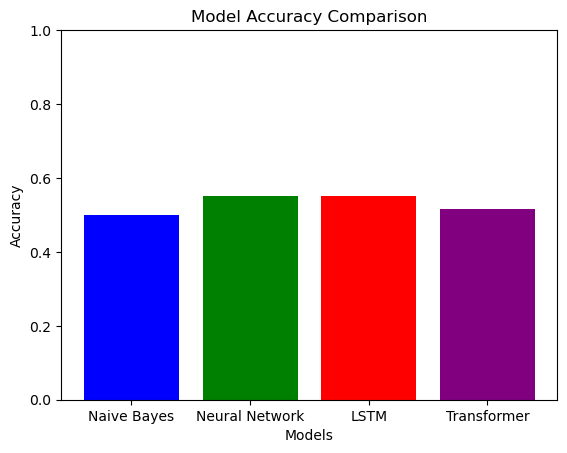

In [37]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

# Example: Generating random data for prediction (Replace with your actual test data)
np.random.seed(42)
X_train = np.random.rand(100, 10, 5)  # Example training data (100 samples, 10 timesteps, 5 features)
y_train = np.random.randint(0, 2, 100)  # Example training labels (binary classification)

X_test = np.random.rand(20, 10, 5)  # Replace with actual test data (20 samples, 10 timesteps, 5 features)
y_test = np.random.randint(0, 2, 20)  # Binary classification labels

# Flatten X_train and X_test for Naive Bayes
X_train_nb = X_train.reshape(X_train.shape[0], -1)  # Flatten to (samples, timesteps * features)
X_test_nb = X_test.reshape(X_test.shape[0], -1)  # Flatten to (samples, timesteps * features)

# Train Naive Bayes model
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train_nb, y_train)  # Fit the Naive Bayes model

# Initialize and train MLP (Neural Network) model
mlp_model = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)
mlp_model.fit(X_train_nb, y_train)  # Fit MLP model

# Initialize and train LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False))
lstm_model.add(Dense(1, activation='sigmoid'))  # Assuming binary classification
lstm_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
lstm_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Initialize and train Transformer model (Example using a simple transformer-like model)
transformer_model = Sequential()
transformer_model.add(Dense(64, input_dim=X_train_nb.shape[1], activation='relu'))
transformer_model.add(Dense(32, activation='relu'))
transformer_model.add(Dense(1, activation='sigmoid'))  # Assuming binary classification
transformer_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
transformer_model.fit(X_train_nb, y_train, epochs=10, batch_size=32, verbose=1)

# Predictions for Naive Bayes, Neural Network (MLP), LSTM, and Transformer
y_pred_nb = naive_bayes_model.predict(X_test_nb)

# For MLP, no reshaping required, it expects a 2D array.
y_pred_mlp = mlp_model.predict(X_test_nb)

# For LSTM and Transformer, apply a threshold of 0.5 (sigmoid output).
y_pred_lstm = (lstm_model.predict(X_test) > 0.5).astype(int)
y_pred_transformer = (transformer_model.predict(X_test_nb) > 0.5).astype(int)

# Print out the classification reports for each model
print("Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))
print("Neural Network Classification Report:\n", classification_report(y_test, y_pred_mlp))
print("LSTM Classification Report:\n", classification_report(y_test, y_pred_lstm))
print("Transformer Classification Report:\n", classification_report(y_test, y_pred_transformer))

# Comparison of Accuracy
accuracy_nb = np.mean(y_pred_nb == y_test)
accuracy_mlp = np.mean(y_pred_mlp == y_test)
accuracy_lstm = np.mean(y_pred_lstm == y_test)
accuracy_transformer = np.mean(y_pred_transformer == y_test)

print("\nModel Accuracy Comparison:")
print(f"Naive Bayes Accuracy: {accuracy_nb:.4f}")
print(f"Neural Network Accuracy: {accuracy_mlp:.4f}")
print(f"LSTM Accuracy: {accuracy_lstm:.4f}")
print(f"Transformer Accuracy: {accuracy_transformer:.4f}")

# If you want to visualize the comparative performance of the models
accuracy_scores = [accuracy_nb, accuracy_mlp, accuracy_lstm, accuracy_transformer]
models = ['Naive Bayes', 'Neural Network', 'LSTM', 'Transformer']

plt.bar(models, accuracy_scores, color=['blue', 'green', 'red', 'purple'])
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Accuracy range from 0 to 1
plt.show()
